SpringBoard Capstone2
Direct Marketing
Unit7: Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
market = pd.read_csv('/Users/Ling/Desktop/01_Springboard/DirectMarketing/Data/train.csv', index_col = 0)
print(market.head())

          age           job   marital            education  default housing  \
RecordID                                                                      
13783      49        admin.  divorced  professional.course       no     yes   
23986      52      services   married          high.school  unknown     yes   
20663      46   blue-collar  divorced             basic.9y       no      no   
13958      26  entrepreneur    single          high.school      yes     yes   
28184      47        admin.    single    university.degree       no      no   

         loan   contact month day_of_week  ...  campaign  pdays  previous  \
RecordID                                   ...                              
13783     yes  cellular   aug         mon  ...         1    115         2   
23986      no  cellular   may         mon  ...         1    402         2   
20663      no  cellular   apr         wed  ...         1    999         1   
13958     yes  cellular   aug         fri  ...        28    9

In [3]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 13783 to 21176
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             22500 non-null  int64  
 1   job             22500 non-null  object 
 2   marital         22500 non-null  object 
 3   education       22500 non-null  object 
 4   default         22500 non-null  object 
 5   housing         22500 non-null  object 
 6   loan            22500 non-null  object 
 7   contact         22500 non-null  object 
 8   month           22500 non-null  object 
 9   day_of_week     22500 non-null  object 
 10  duration        22500 non-null  int64  
 11  campaign        22500 non-null  int64  
 12  pdays           22500 non-null  int64  
 13  previous        22500 non-null  int64  
 14  poutcome        22500 non-null  object 
 15  emp.var.rate    22500 non-null  float64
 16  cons.price.idx  22500 non-null  float64
 17  cons.conf.idx   22500 non-n

In [4]:
market_test = pd.read_csv('/Users/Ling/Desktop/01_Springboard/DirectMarketing/Data/test.csv', index_col = 0)
print(market.head())

          age           job   marital            education  default housing  \
RecordID                                                                      
13783      49        admin.  divorced  professional.course       no     yes   
23986      52      services   married          high.school  unknown     yes   
20663      46   blue-collar  divorced             basic.9y       no      no   
13958      26  entrepreneur    single          high.school      yes     yes   
28184      47        admin.    single    university.degree       no      no   

         loan   contact month day_of_week  ...  campaign  pdays  previous  \
RecordID                                   ...                              
13783     yes  cellular   aug         mon  ...         1    115         2   
23986      no  cellular   may         mon  ...         1    402         2   
20663      no  cellular   apr         wed  ...         1    999         1   
13958     yes  cellular   aug         fri  ...        28    9

In [5]:
market_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 14664 to 16692
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             7500 non-null   int64  
 1   job             7500 non-null   object 
 2   marital         7500 non-null   object 
 3   education       7500 non-null   object 
 4   default         7500 non-null   object 
 5   housing         7500 non-null   object 
 6   loan            7500 non-null   object 
 7   contact         7500 non-null   object 
 8   month           7500 non-null   object 
 9   day_of_week     7500 non-null   object 
 10  duration        7500 non-null   int64  
 11  campaign        7500 non-null   int64  
 12  pdays           7500 non-null   int64  
 13  previous        7500 non-null   int64  
 14  poutcome        7500 non-null   object 
 15  emp.var.rate    7500 non-null   float64
 16  cons.price.idx  7500 non-null   float64
 17  cons.conf.idx   7500 non-nul

In [6]:
market.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,40.904489,1146.554311,3.857244,774.562533,1.316444,0.078529,93.538746,-39.872633,3.307811,5138.567351
std,12.026945,1430.790448,7.210891,326.020060,1.918733,1.573831,0.647698,5.692010,1.608627,81.748896
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,144.000000,1.000000,558.750000,0.000000,-1.800000,92.969840,-43.643788,1.410000,5081.293851
50%,38.000000,354.000000,2.000000,999.000000,0.000000,1.100000,93.485726,-41.522404,3.964364,5165.319989
75%,48.000000,1877.000000,3.000000,999.000000,2.000000,1.400000,93.994000,-36.100000,4.864000,5218.069326
max,98.000000,4918.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# make sure there were no NA values
missing = market.isnull().sum()
missing

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
dtype: int64

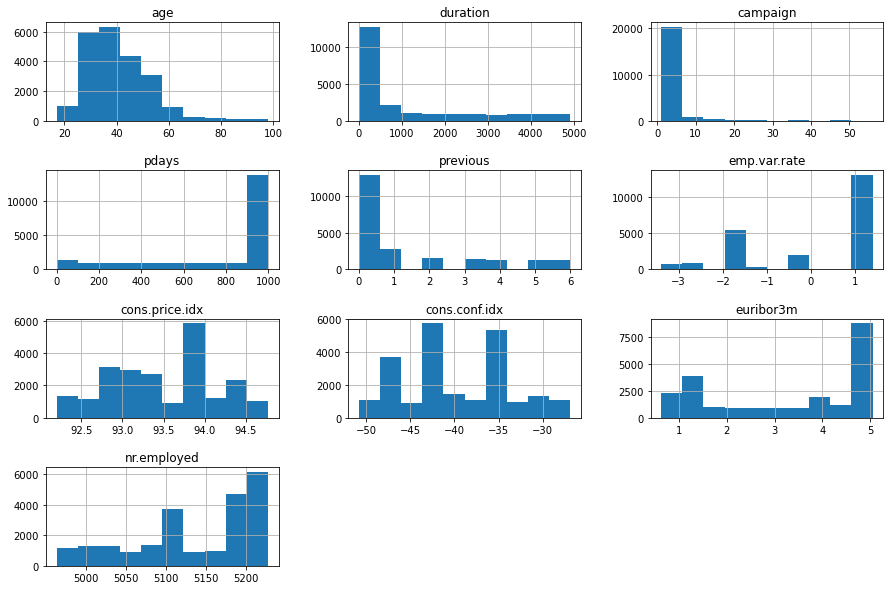

In [8]:
market.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

In [9]:
column_name = market.columns.values.tolist()
print(column_name)
cat = []
for c in column_name:
    if market[c].dtype == 'object':
        cat.append(c)
print(cat)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribe']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'subscribe']


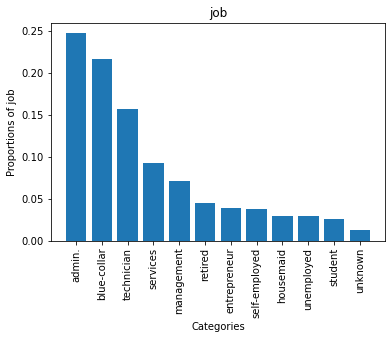

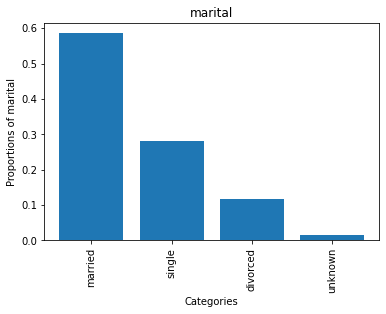

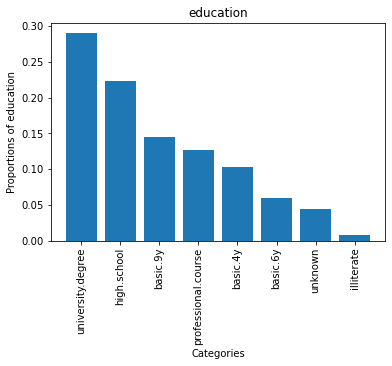

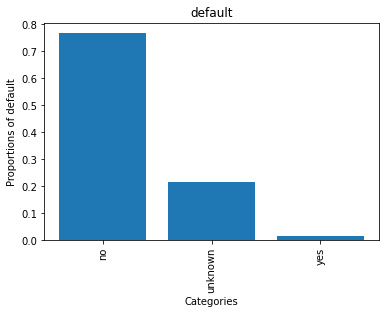

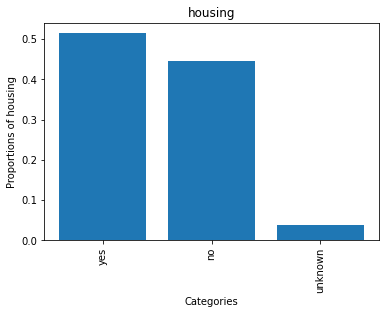

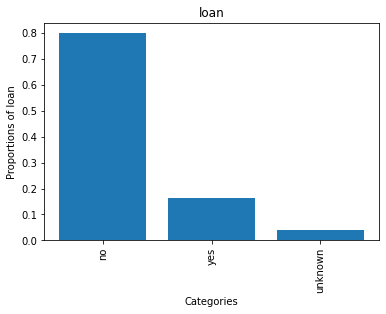

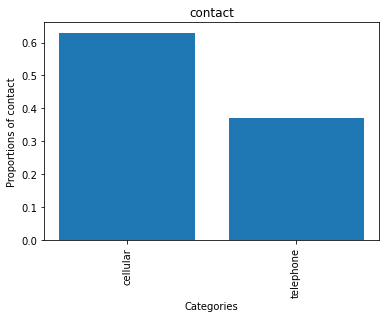

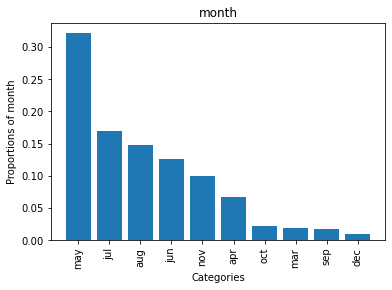

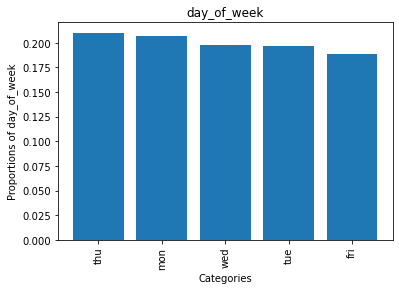

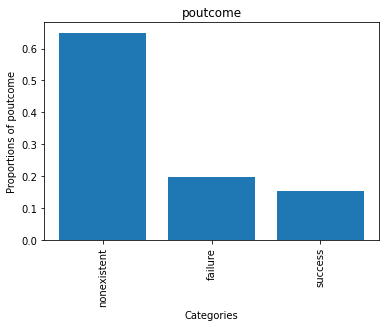

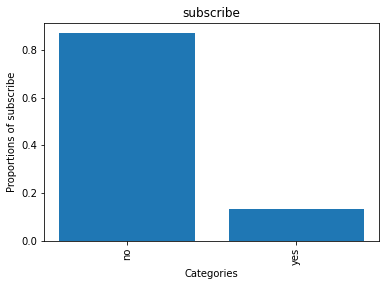

In [14]:
for c in cat:
    categories = market[c].value_counts().index
    counts = market[c].value_counts(normalize=True).values
    plt.bar(categories, counts)
    plt.xticks(rotation=90)
    plt.title(c)
    plt.xlabel('Categories')
    plt.ylabel(str('Proportions of ' + c))
    plt.show()
    plt.close()